In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from config import *

from game import StaticGame
from agents import EpsGreedyAgent, BolzmanAgent

from utils import plot_trust_honesty
from utils import plot_qvalues

In [2]:
# test boltzman agent

In [15]:
def play_game(qval_init_seller, qval_init_buyer, lambda_seller, lambda_buyer, 
              n_iters, n_games):
    agent_seller = BolzmanAgent(name='seller', qval=qval_init_seller, 
                                player_lambda=lambda_seller)
    agent_buyer = BolzmanAgent(name='buyer', qval=qval_init_buyer, 
                               player_lambda=lambda_buyer)
    game = StaticGame()
    
    # stats
    total_rewards = {'seller': [], 'buyer': []}
    qvalues = {
        'seller': {'lemon': [], 'peach': []}, 
        'buyer': {'high_price': [], 'low_price': []}
    }
    stats = np.zeros((n_games, 3))
    
    # games
    for game_num in range(n_games):
        
        agent_seller.clear_history()
        agent_buyer.clear_history()
        
        # collect stats for training
        for iter_num in range(n_iters):
            game.reset()
            
            seller_action = agent_seller.choose_action(game.car_type)
            game.step('seller', seller_action)
            buyer_action = agent_buyer.choose_action(seller_action)
            game.step('buyer', buyer_action)
            
            agent_seller.observe_reward(game.reward('seller'))
            agent_buyer.observe_reward(game.reward('buyer'))
            
        agent_seller.update_policy()
        agent_buyer.update_policy()
        
        total_rewards['seller'].append(np.sum(agent_seller.history['rewards']))
        total_rewards['buyer'].append(np.sum(agent_buyer.history['rewards']))
        
        for obs_type in ('lemon', 'peach'):
            qvalues['seller'][obs_type].append(list(agent_seller.probs[obs_type]))
        for obs_type in ('high_price', 'low_price'):
            qvalues['buyer'][obs_type].append(list(agent_buyer.probs[obs_type]))
            
        stats[game_num, 0] = CAR_TYPE_TO_ID[game.car_type]
        stats[game_num, 1] = ACTION_TO_ID['seller'][seller_action]
        stats[game_num, 2] = ACTION_TO_ID['buyer'][buyer_action]
    
    return qvalues, stats, total_rewards

# Example #1

Shows that distrustful buyer can change their mind with honest seller. 
In addition, the greater rationality parameter (lambda), the faster the game converges to a situation where players behave honestly and all deals are successfull.

In [104]:
# parameters
qval_init_seller = {
    'lemon': [0, 0],
    'peach': [0, 0],
}

qval_init_buyer = {
    'high_price': [0, 1],
    'low_price': [0, 1],
}

n_iters = 20
n_games = 200

seller_lambda = 5.
buyer_lambda = 5.

# lemon-peach, high_price-low_price, buy-not_buy

In [105]:
result = play_game(
    qval_init_seller, 
    qval_init_buyer, 
    seller_lambda, 
    buyer_lambda, 
    n_iters, 
    n_games
)

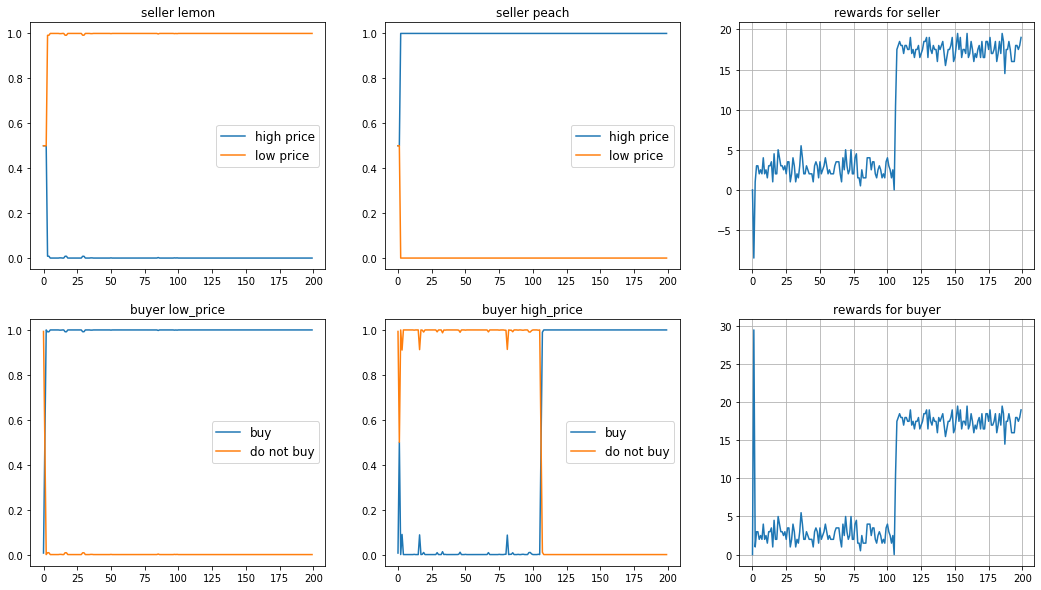

In [106]:
plot_qvalues(result[0], n_games, rewards=result[2])

[INFO] %successfull deals: 0.015


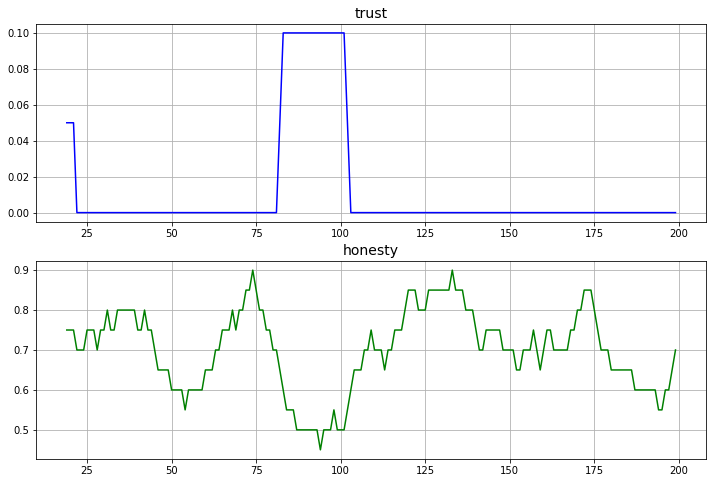

In [94]:
_ = plot_trust_honesty(result[1], n_games)

# Example #2

In [53]:
# parameters
qval_init_seller = {
    'lemon': [0, 0],
    'peach': [0, 0],
}

qval_init_buyer = {
    'high_price': [0, 1],
    'low_price': [0, 1],
}

n_iters = 20
n_games = 200

seller_lambda = 5.
buyer_lambda = 1.

# lemon-peach, high_price-low_price, buy-not_buy

[INFO] %successfull deals: 0.995


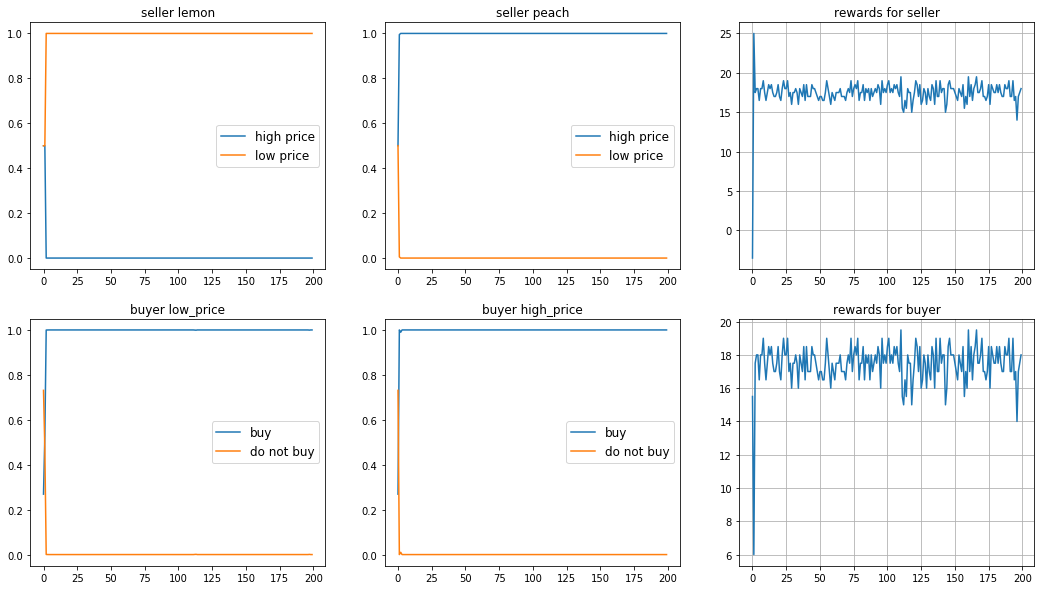

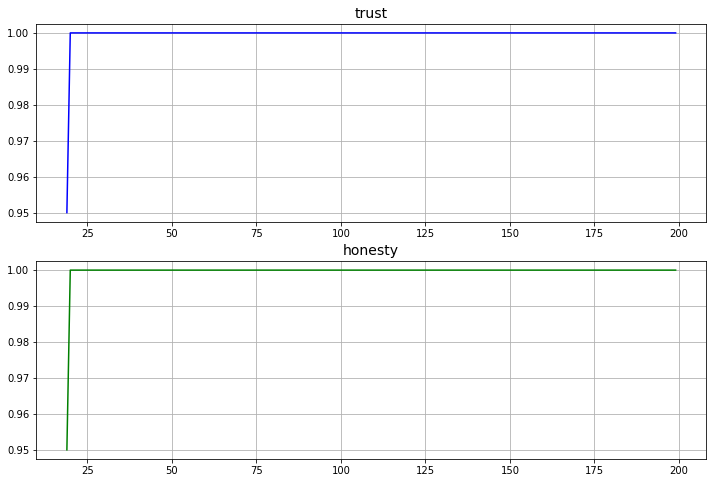

In [54]:
result = play_game(
    qval_init_seller, 
    qval_init_buyer, 
    seller_lambda, 
    buyer_lambda, 
    n_iters, 
    n_games
)

plot_qvalues(result[0], n_games, rewards=result[2])

_ = plot_trust_honesty(result[1], n_games)

# Example #3

Lost of trust-honesty led to no deals.

[INFO] %successfull deals: 0.215


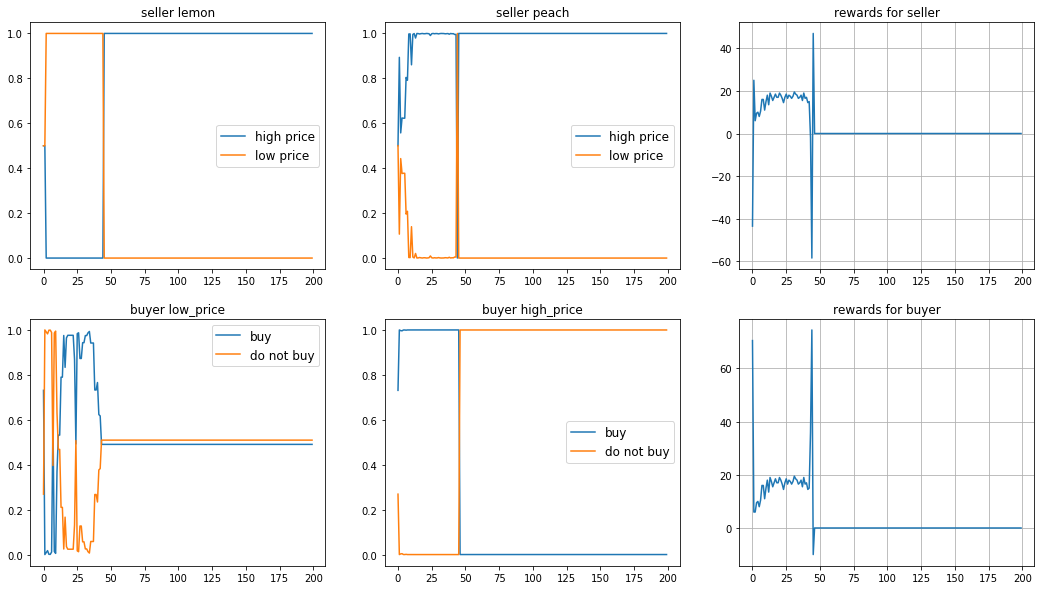

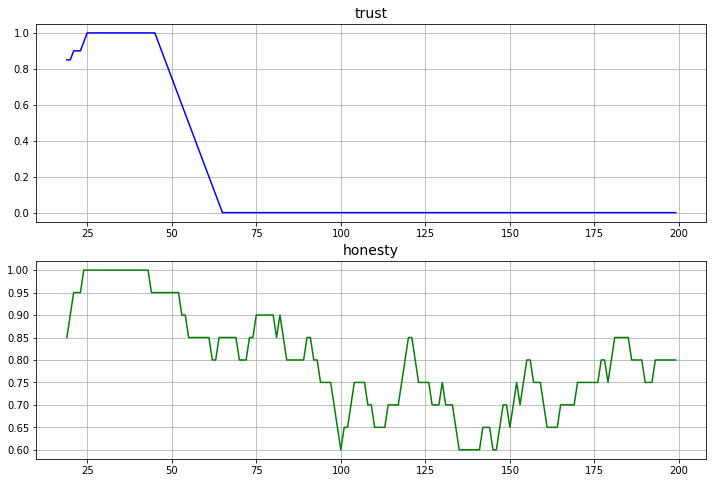

In [61]:
# parameters
qval_init_seller = {
    'lemon': [0, 0],
    'peach': [0, 0],
}

qval_init_buyer = {
    'high_price': [1, 0],
    'low_price': [1, 0],
}

n_iters = 20
n_games = 200

seller_lambda = 1.
buyer_lambda = 1.

# lemon-peach, high_price-low_price, buy-not_buy

result = play_game(
    qval_init_seller, 
    qval_init_buyer, 
    seller_lambda, 
    buyer_lambda, 
    n_iters, 
    n_games
)

plot_qvalues(result[0], n_games, rewards=result[2])

_ = plot_trust_honesty(result[1], n_games)

# Example #4

[INFO] %successfull deals: 0.265


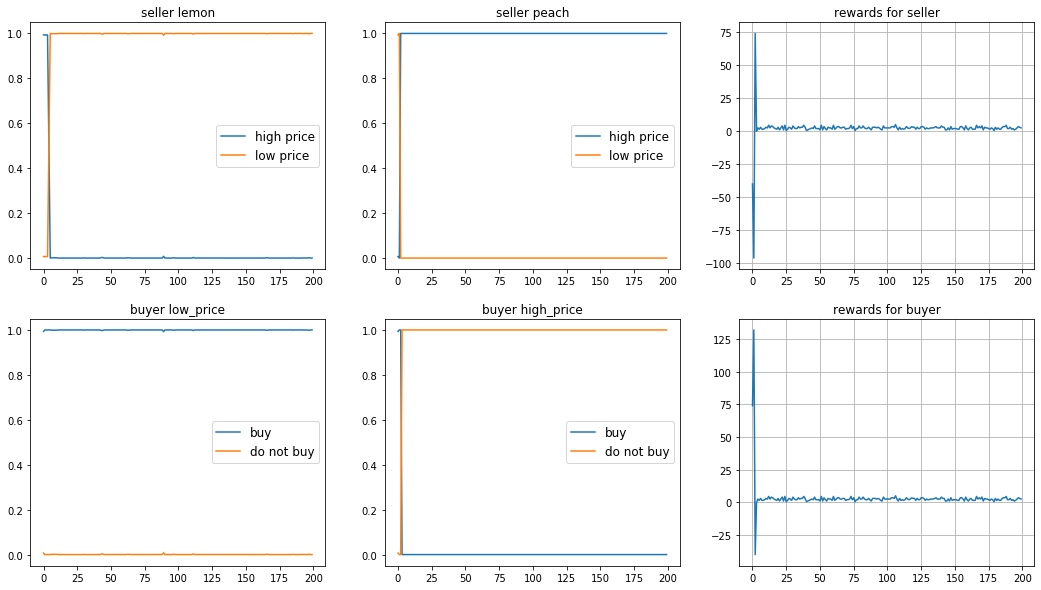

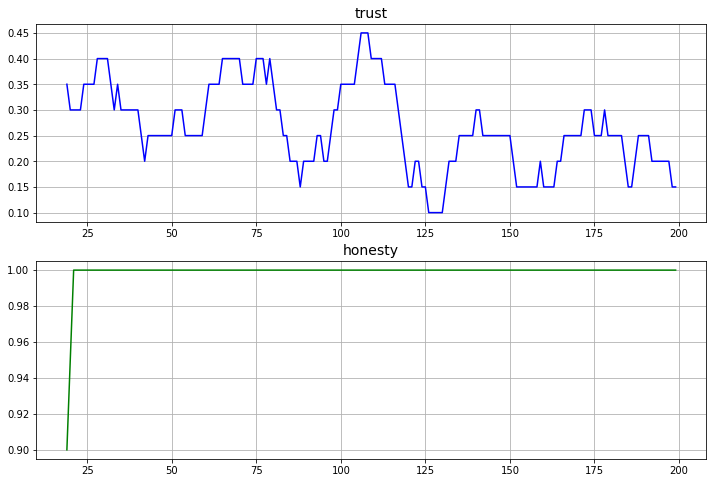

In [81]:
# parameters
qval_init_seller = {
    'lemon': [1, 0],
    'peach': [0, 1],
}

qval_init_buyer = {
    'high_price': [1, 0],
    'low_price': [1, 0],
}

n_iters = 20
n_games = 200

seller_lambda = 5.
buyer_lambda = 5.

# lemon-peach, high_price-low_price, buy-not_buy

result = play_game(
    qval_init_seller, 
    qval_init_buyer, 
    seller_lambda, 
    buyer_lambda, 
    n_iters, 
    n_games
)

plot_qvalues(result[0], n_games, rewards=result[2])

_ = plot_trust_honesty(result[1], n_games)